So far, given a training set $T=\{ (\underline x^{(n)}, y^{(n)}) \}$, we fitted linear functions of the form $f(\underline x; \underline w) = \underline w^T\phi(\underline x)$, where where $|\underline x|=D$ and  $|\underline w |=|\phi(\underline x)|=K$. However, in many real world applications, given an input $\underline x$, there is often uncertainty regarding the value of $y$. This makes it difficult to formulate a training set as we did above.

For instance, say we'd like to predict the strength of concrete given the amount of sand that was used in the mixture. To collect training data, we pick some sand amounts $\{x^{(n)}\}$. Say for each $x^{(n)}$, we build concrete 10 times and measure the concrete strength $y^{(n)}_i$, $i=1$ to $10$, resulted from using that much sand each time. It is very realistic to get different values, as there may be other factors that we did not have control over. For instance, perhaps we mistakenly slipped different amounts of water each time. Or, the weather might have been warmer some times, resulting in quicker strengthening, compared to other times.

Such a scenario is illustrated below. For each input $\underline x$, we have outputs with error bar $\pm\sigma_y$. That is, the standard deviation of each measurement is $\sigma_y$.

<img src="Machine Learning/img/3_bayesian_linear_regression_bars.svg" />

Of course, we could simply average each measurement to get one value, i.e. build the training pair $\left( \underline x^{(n)}, y^{(n)} = \sum_{i=1}^{10} y^{(n)}_i \right)$. But what if we wanted a framework that allows us to embed this uncertainty about the specific response $y$ given an input $\underline x$?

All of the three lines aboce are plausible fits to the data. Due to the measurement noise, we just don't know what the "correct" fit is. We would like to have an "intelligent agent" to answer questions like:
- what are the possible fits to this data, and how uncertain are we about each such fit?
- given a new input location, what are possible outputs at that location, and how uncertain are we about each such output?

That is, we would like a formal way to answer such questions in a way that allows for the expression of our uncertainty about a particular answer. We can use probability theory.

# Representing uncertainty

## Uncertainty about predictions

Given
- function $f(\cdot; \underline w)$, i.e. we know both the family of the parametric function, and its parameters;
- an input $\underline x$

we can represent our uncertainty about the output $y$ by assuming that $y$ is drawn from a normal distribution centred at $f(\underline x; \underline w)$, with standard deviation $\sigma_y$.

That is, we assume 
$$
  y = f(\underline x; \underline w) + \nu, \nu \sim N(0, \sigma_y^2).
$$
That is, $p(\nu) = N(\nu; 0, \sigma_y^2)$.

Alternatively, 
$y \sim N(f(\underline x; \underline w), \sigma_y^2)$.
That is, $p(y|\underline x, f(\cdot; \underline w)) = N(y; f(\underline x; \underline w), \sigma_y^2)$. This is also known as the **observation model**.
Here, $f(\cdot; \underline w)$ is an unapplied function parametrised by $\underline w $.

### Maximum Likelihood

A small note now. We have already embedded _some_ uncertainty in our pipeline. Mainly, for a given model $f(\cdot; \underline w)$ and an input $\underline x$, we assumed the output $y$ is normally distributed with mean $f(\underline x; \underline w)$ and standard deviation $\sigma_y$. We also assumed that the standard deviation is constant for all outputs. We can formulate the likelihood of the outputs given the inputs and the model:

$$
  p(Y|X, f(\cdot; \underline w)) = \prod_n p(y^{(n)}|x^{(n)}, f(\cdot; \underline w)).
$$

In general, likelihood of [placeholder] is a term for when we consider the probability of the data as a function of [placeholder].

One thing to do is to fit the parameters to maximise the likelihood. This is known as the _maximum likelihood_ approach to model fitting. It's equivalent to minimising the negative log-likelihood, where computations are easier:

$$
\begin{align}
  -\log p(Y|X, f(\cdot; \underline w)) &= -\sum_n \log p(y^{(n)}|nderline x^{(n)}, f(\cdot; \underline w))\\
  &= \frac{1}{2\sigma_y^2} \sum_{n=1}^N \left[ y^{(n)} - f(\underline x^{(n)}; \underline w) \right]^2 + \frac{N}{2} \log(2\pi\sigma_y^2).
\end{align}
$$

Here, we have used the fact that:
$$
  N(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right],
$$

so:
$$
  \log N(x; \mu, \sigma^2) = -\frac{1}{2\sigma^2}(x-\mu)^2 - \log(2\pi\sigma^2)^{1/2} = -\frac{1}{2\sigma^2}(x-\mu)^2 - \frac{1}{2} \log (2\pi\sigma^2).
$$

Conclusion: having assumed a constant noise variance $\sigma_y^2$, we end up fitting the parameters $\underline w $ simply by minimising the square error, exactly as done earlier in the course. Of course, we could choose non-constant variance, in which case we cannot pull the resulting $\frac{1}{2(\sigma_y^{(n)})^2}$ term out of the sum. We call $\frac{1}{(\sigma_y^{(n)})^2}$ the _precision_. In this case, the squared difference of each sample would be weighted by its individual precision.

But maximum likelihood is not ... Bayesian.

## Uncertainty about the model

Let us restrict the model family to functions the form $f(x; \underline w)=\underline w^T \phi(x)$ where $\phi(x)=[1, x]^T$, i.e. $f(x; \underline w) = w_1 + w_2 x$. So, if we knew the parameters $\underline w $, we could compute the function for any $x$ and simulate what typical observations at that location $x$ would look like. However, when learning from data, we don’t know the parameters $\underline w $.

### The prior over models
We do not know the parameters, but we may have some **prior** belief about what the parameters should be. **Prior** as in it's a belief that we have before we see any data. For instance, we may know that the correlation between amount of sand and concrete strength should be positive, i.e. the function should have a positive slope. Indeed, we intuitively expect the strength to grow as we put more sand in, not decrease.

We represent our prior beliefs and uncertainty about the parameters with a distribution over the space of parameters $p(\underline w)$. This way we express uncertainty about the function itself. Since we have already fixed the function family, the function is now fully specified by the parameters.

For example, we could set:
$$
p(\underline w) = N(\underline w; \underline w _0, V_0) = N(\underline w;\underline v 0, 0.4^2I_2) = N\left(
\begin{bmatrix} 
  w_1 \\
  w_2
\end{bmatrix}
;
\begin{bmatrix} 
  0 \\
  0
\end{bmatrix}
,
\begin{bmatrix} 
  0.4^2 & 0 \\
  0 & 0.4^2
\end{bmatrix}
\right).
$$
That is, we think the following functions are all reasonable models we could consider. To produce a line in the plot below, we sampled parameters from the distribution above and plotted the resulting function.

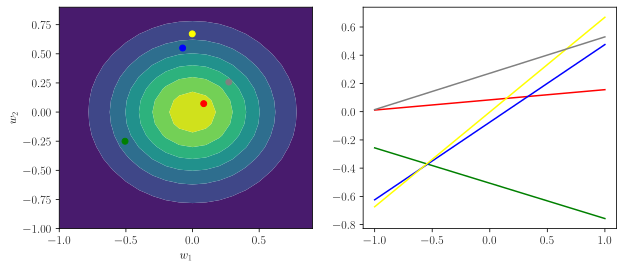

In [8]:
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

np.set_printoptions(precision=2)
plt.rcParams.update({'font.size': 12, 'text.usetex': True})

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].set(xlabel=r"$w_1$", ylabel=r"$w_2$")

w_0 = np.array([0, 0])
V_0 = 0.4**2 * np.identity(2)

dist = multivariate_normal([0, 0], 0.4**2)
x1, x2 = np.mgrid[-1:1:0.1, -1:1:0.1]

points = np.dstack([x1, x2])#.reshape(-1, 2)
ax[0].contourf(x1, x2, dist.pdf(points))

x = np.linspace(-1, 1)
colors = ['red', 'green', 'blue', 'yellow', 'gray']
for color in colors:
    w1, w2 = dist.rvs()
    ax[0].plot([w1], [w2], 'o', c=color)
    ax[1].plot(x, w1 + w2 * x, c=color)

plt.show()

### The posterior over models


We formulated some prior beliefs. At this point, consider the following experiment. We go ahead and build concrete using various amounts of sand $\underline x^{(1)}, \ldots, nderline x^{(N)}$. For each amount of sand $\underline x^{(n)}$, we assume the **true** concrete strength is given by the parametric function $f(\underline x^{(n)}; \underline w)$. We have a prior over what that function may be.

Now imagine that, for each amount of sand $\underline x^{(n)}$, we build concrete several times. Under perfect conditions, the resulting concrete should have the strength $f(\underline x^{(n)}; \underline w)$ every time. However, several things may go wrong: weather conditions, such as temperature, and humidity, may vary across several builds. As a result, for the same amount of sand $\underline x^{(n)}$, we may get slightly different concrete strengths every time. We express our uncertainty about the concrete strength with an **observation model** $p(y^{(n)} | nderline x^{(n)}, f(\cdot; \underline w))$.

In the linear regression case, we assumed $p(y^{(n)} | nderline x^{(n)}, f(\cdot; \underline w)) = \mathcal{N}(y^{(n)}; f(\underline x^{(n)}; \underline w), \sigma_y)$. Note that we assume this standard deviation is the same for all amounts of sand $\underline x^{(n)}$, hence we called it $\sigma_y$, not $\sigma_y^{(n)}$.

Via the experiment above we can construct a training dataset $D=\{(\underline x^{(n)}, y^{(n)}\}$ of $N$ pairs. Note that $y^{(n)}$ here could be the average observed strength across several concrete-building experiments given the amount of sand $\underline x^{(n)}$.

We now formulate the **posterior** distribution $p(\underline w |D)$ over the weight space. This is a distribution over models, since the weights fully specify the models - having the prior assumption that we are working with the family of linear models. This distrivution reflects our beliefs and uncertainty about the weights after having observed the $N$ training examples in $D$. Using Bayes' rule:
$$
  p(\underline w |D) = \frac{p(D|\underline w) p(\underline w)}{p(D)} \propto p(D|\underline w) p(\underline w).
$$
Here, $p(\underline w)$ is the prior of the parameters that we saw before. $p(D|\underline w)$ is called the **likelihood** of the parameters. Intuitively, how likely it is that our data was generated using these specific parameters.

In general, likelihood of [placeholder] is a term for when we consider the probability of the data as a function of [placeholder]. The likelihood function is not a probability distrbution, as $\int p(D|\underline w)d\underline w \ne 1$. Intuitively, it could be that there are 100 parameter settings and, under each setting, our data would be generated with the same probability 0.1. That sums up to 10, not to 1.

In our case, we assume $X=\{nderline x^{(n)}\}$ are fixed quantities that do not affect our beliefs. With these assumption in place, we write:
$$
  p(\underline w |D) = p(\underline w |Y, X) = \frac{p(Y|\underline w , X) p(\underline w)}{p(Y|X)} \propto p(Y|\underline w , X) p(\underline w) = p(\underline w) \prod_n p(y^{(n)}|\underline w , x^{(n)}).
$$
where $Y=\{y^{(n)}\}$.

At a high level, Bayesian inference updates beliefs before seeing the data (given by the prior), so that parameters that are compatible with the data (high likelihood) become more probable under our new beliefs (given by the posterior).

How do we compute the posterior? Luckily, our prior is a *conjugate prior* to the likelihood. That is, a prior where the product of the prior and likelihood combines to give a distribution with the same functional form as the prior. In our case, our prior is a Gaussian, which is a conjugate prior to the likelihood, also a Gaussian.

So, we have:
$$
p(\underline w |D) \propto N(\underline w; \underline v 0, \sigma_w^2 I) \prod_n N(y^{(n)}; \underline w^T \underline x^{(n)}, \sigma_y^2) = N(\underline w; \underline v 0, \sigma_w^2 I) N(\underline y; X\underline w , \sigma_y^2 I) = N(\underline w; \underline w _N, V_N).
$$

After grunt work we get:
$$
\begin{align}
V_N &= \sigma_y^2 (\sigma_y^2 V_0^{-1} + X^T X)^{-1} \\
\underline w _N &= V_N V_0^{-1} \underline w _0 + \frac{1}{\sigma_y^2} V_N X^T Y.
\end{align}
$$

Recall that $\underline w _0$ and $V_0$ are the mean vector and covariance matrix of the prior, respectively. That is, the mean and covariance after seeing 0 data points.

Here is that grunt work:
$$
\begin{align*} 
  p(\underline w |D) &\propto p(\underline w)\; p(D|\underline w)\\ &\propto \mathcal{N}(\underline w; \underline w _0, V_{0}) \prod_{n}^{N} \mathcal{N}(y^{(n)}; \underline w^T\phi^{(n)}, \sigma_{y}^{2})\\ &\propto \mathcal{N}(\underline w; \underline w _0, V_{0}) \; \mathcal{N}(Y; \Phi \underline w , \sigma_{y}^{2}\mathbb{I})\\ &\propto \exp\Big(-\frac{1}{2}\big((\underline w - \underline w _0)^{\top}V_{0}^{-1}(\underline w - \underline w _0) + \frac{1}{\sigma_{y}^{2}}(Y - \Phi \underline w)^{\top}(Y - \Phi \underline w)\big)\Big)\\ &\propto \exp\Big(-\frac{1}{2}\big(\underline w^{\top}V_{0}^{-1}\underline w - 2 \underline w^{\top}V_{0}^{-1} \underline w _0 + \underline w _0^{\top}V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}}(Y^{\top}Y - 2\underline w^{\top}\Phi ^{\top} Y + \underline w^{\top}\Phi ^{\top} \Phi \underline w)\big) \Big)\\ &\propto \exp\Big(-\frac{1}{2}\big(\underline w^{\top}(V_{0}^{-1} +\frac{1}{\sigma_{y}^{2}} \Phi ^{\top} \Phi) \underline w - 2 \underline w^{\top} (V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}} \Phi ^{\top} Y) + \underline w _0^{\top}V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}}Y^{\top}Y \big) \Big)\\ &\propto \exp\Big(-\frac{1}{2}\big(\underline w^{\top}(V_{0}^{-1} +\frac{1}{\sigma_{y}^{2}} \Phi ^{\top} \Phi) \underline w - 2 \underline w^{\top} (V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}} \Phi ^{\top} Y) \big) \Big)
\end{align*}.
$$

Notice how a normal distribution with mean $\underline w _N$ and covariance $V_{N}$ would expand
$$
\begin{align*} \mathcal{N}(\underline w; \underline w _N, V_{N}) &\propto \exp\Big(-\frac{1}{2}\big(\underline w - \underline w _N)^{\top}V_{N}^{-1}(\underline w - \underline w _N) \Big)\\ &\propto \exp\Big(-\frac{1}{2}\big(\underline w^{\top}V_{N}^{-1}\underline w - 2 \underline w^{\top}V_{N}^{-1} \underline w _N + \underline w _N^{\top}V_{N}^{-1} \underline w _N \big) \Big)\\ &\propto \exp\Big(-\frac{1}{2}\big(\underline w^{\top}V_{N}^{-1}\underline w - 2 \underline w^{\top}V_{N}^{-1} \underline w _N \big) \Big).\end{align*}
$$

By comparing the terms of this with the previous expression for the posterior we can see:
$$
\begin{align*} V_{N}^{-1} &= (V_{0}^{-1} +\frac{1}{\sigma_{y}^{2}} \Phi ^{\top} \Phi)\\ \mathbb{I} &= (V_{0}^{-1} +\frac{1}{\sigma_{y}^{2}} \Phi ^{\top} \Phi) V_{N}\\ \sigma_{y}^{2} \mathbb{I} &= (\sigma_{y}^{2} V_{0}^{-1} + \Phi ^{\top} \Phi) V_{N} \\ V_{N} &= \sigma_{y}^{2} (\sigma_{y}^{2} V_{0}^{-1} + \Phi ^{\top} \Phi)^{-1} \end{align*}
$$
And
$$
\begin{align*} V_{N}^{-1} \underline w _N &= (V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}} \Phi ^{\top} Y) \\ \underline w _N &= V_{N} (V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}} \Phi ^{\top} Y) \end{align*}
$$

# Bayesian prediction

So far we formalised:
- our **prior** beliefs about the parameters, i.e. our beliefs before seeing any data;
- our **posterior** beliefs about the parameters, i.e. our beliefs after seeing some data.

We now focus on prediction. That is, given a new input $\underline x^*$, not present in the training set $D$, we would like to express our uncertainty regarding possible outputs $y^*$ in the form of a distribution $p(y^* | \underline x^*, D)$.

Before looking at linear regression in particular, let us discuss a general strategy for solving such prediction problems.

## General Strategy

We often can't immediately write down a mathematical expression for $p(y|\text{data})$. So, by using the sum rule, we introduce "stuff" $z$ (model parameters and/or latent variables) that helps us define the problem.

$$
p(y|\text{data}) = \sum_zp(y, z | \text{data}) = \sum_z p(y|z, \text{data}) p(z|\text{data}).
$$

If we would know how to predict $y$ if we were told the extra stuff $z$, we can find the predictive distribution: weight the predictions for each possible stuff, $p(y|z, \text{data})$, by the posterior probability of the stuff, $p(z | \text{data})$. We get the posterior from Bayes’ rule.

Note: sometimes the extra stuff summarizes everything we need to know to make a prediction, and the data is irrelevant, i.e. $p(y|z, \text{data}) = p(y|z)$.

## Predictions for linear regression

$$
\begin{align}
  p(y^* | \underline x^*, D) &= \int p(y^*, \underline w | \underline x^*, D) d\underline w & \text{[sum rule]} \\
  &=\int p(y^* | \underline w , \underline x^*, D) p (\underline w | \underline x^*, D) d\underline w & \text{[product rule]}\\   &=\int p(y^* | \underline w , \underline x^*) p(\underline w | D) d\underline w .
\end{align}
$$

To get the last line, notice that:
- given parameters $\underline w $, the distribution of $y^*$ is not dependent on $D$ anymore, only on $\underline x^*$;
- the posterior distribution of the parameters $\underline w $ is not dependent on the new $\underline x^*$.

Plugging in the known forms of the posterior and the predictive distribution for given parameters, the expression becomes:
$$
  p(y^* | \underline x^*, D) = \int \mathcal{N}(y^*; f(\underline x^*; \underline w), \sigma_y^2) \mathcal{N}(\underline w; \underline w _N, V_N) d\underline w .
$$

How do we compute this integral...? Analytically it's quite tedious. Instead, we can note the following.

We have assumed that, given function $f(\cdot; \underline w)$, and an input $\underline x$, the output $y$ is a random variable, distributed as $p(y | \underline x, f(\cdot;, \underline w)) = \mathcal{N}(y; f(\underline x; \underline w), \sigma_y^2)$. This is the same as saying

$$
  y = f(\underline x; \underline w) + \nu,\ \ \ p(\nu) = \mathcal{N}(\nu; 0, \sigma_y^2).
$$

For linear regression, we know $f(\underline x; \underline w) = \underline w^T \underline x$, i.e. $y = \underline w^T\underline x + \nu$. We know $p(\underline w |D) = \mathcal{N}(\underline w; \underline w _N, V_N)$, so $p(\underline x^T\underline w |D) = \mathcal{N}(\underline x^T\underline w; \underline x^T\underline w _N, \underline x^T V_N \underline x)$, because $\underline x^T\underline w $ is a linear combination of Gaussians (each $w_i$ is a Gaussian).

So, since $p(\nu) = \mathcal{N}(\nu; 0, \sigma_y^2)$, we have:

$$
p(y^* | \underline x^*, D) = \mathcal{N}\left(y^*; (\underline x^*)^T\underline w _N + 0, \underline x^T V_N \underline x + \sigma_y^2\right).
$$


# Bayesian decision making

Given a test input $\underline x^*$, the Bayesian approach says that we don't know what the output $y^*$ will be. It does not return a single value, but a distribution over possible values. However, we sometimes need to provide point-estimates $\hat y^*$.

We can provide such a point estimate by writing down a loss function $L(y, )$

# Summary

* Dataset $D=\{(\underline x^{(n)}, y^{(n)})\}$;
* Observation model $p(y^{(n)} | \underline x^{(n)}, f(\cdot; \underline w))$;
* Prior over models $p(\underline w)$;
* Posterior over models $p(\underline w | D)$;
* Predictions $p(y^* | \underline x^*, D) = \int p(y^*, \underline w | \underline x^*, D) d\underline w = \int p(y^* | \underline w , \underline x^*, D) p(\underline w | \underline x^*, D)$

For linear regression:
* Assume $f(\underline x, \underline w) = \underline w^T \phi(\underline x)$;
* Observation model $ p(y^{(n)} | \underline x^{(n)}, \underline w) = \mathcal{N}(y^{(n)}; f(\underline x; \underline w), \sigma_y)$. We wrote $p(y^{(n)} | \underline x^{(n)}, \underline w)$ instead of $p(y^{(n)} | \underline x^{(n)}, f(\cdot; \underline w))$ because we have the prior belief that the true model has the form $f(\underline x; \underline w) = \underline w^T \phi(\underline x)$. As such, the model is fully specified by the weights;
* Prior over models $p(\underline w) = \mathcal{N}(\underline w; \underline w _0, V_0)$;
* Posterior over models $p(\underline w | D) = p(\underline w | Y, X) \propto p(\underline w) \prod_n p(y^{(n)} | \underline x^{(n)}, \underline w) = \mathcal{N}(\underline w; \underline w _N, V_N)$, where

$$
\begin{align}
V_{N} =& \sigma_{y}^{2} (\sigma_{y}^{2} V_{0}^{-1} + \Phi ^{\top} \Phi)^{-1}\\
\underline w _N =& V_{N} (V_{0}^{-1} \underline w _0 + \frac{1}{\sigma_{y}^{2}} \Phi ^{\top} Y)
\end{align}
$$

* Predictions $p(\underline y^* | \underline x^*, D) = \int p(y^* | \underline w , nderline x^*) p(\underline w | D) = \mathcal{N} (y^*; (\underline x^*)^T \underline w _N, (\underline x^*)^T V_N nderline x^* + \sigma_y^2)$;

As an example, consider $\underline w _0 = \underline v 0$, $V_0 = 0.4^2 I_2$.

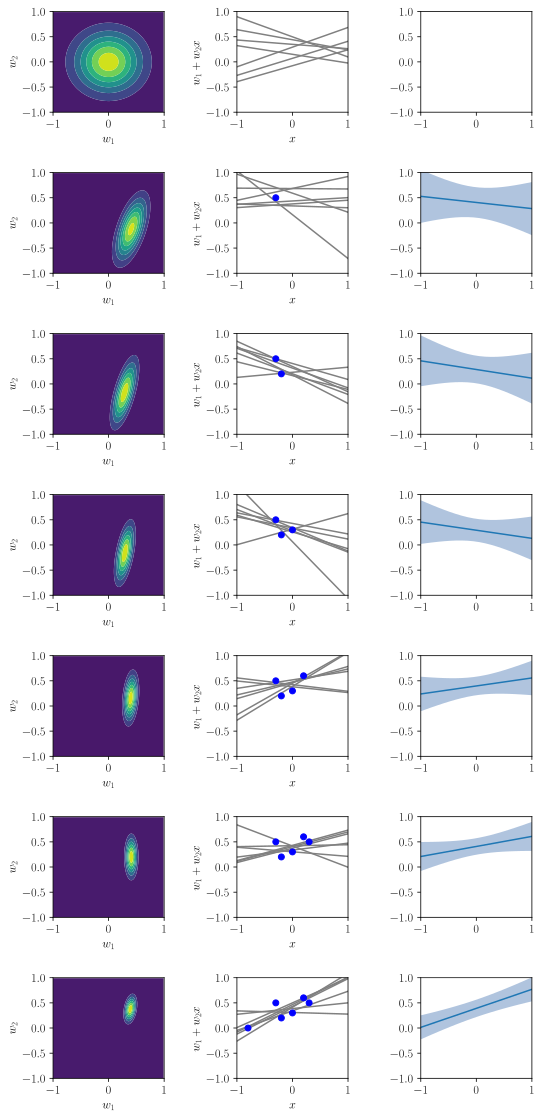

In [9]:
fig, ax = plt.subplots(7, 3, figsize=(8, 16))

# =========================================================================== #
# Prior
w_0 = np.array([
    [0], 
    [0]
])
V_0 = 0.4**2 * np.identity(2)
prior = multivariate_normal(w_0.flatten(), V_0)

x1, x2 = np.mgrid[-1:1:0.01, -1:1:0.01]
points = np.dstack([x1, x2])

ax[0, 0].contourf(x1, x2, prior.pdf(points))

x = np.linspace(-1, 1)
for _ in range(7):
    w1, w2 = prior.rvs()
    ax[0, 1].plot(x, w1 + w2 * x, c="gray")

# =========================================================================== #
# Data points
Phi = np.array([
  [ 1,  -0.3],
  [ 1,  -0.2],
  [ 1,   0. ],
  [ 1,   0.2],
  [ 1,   0.3],
  [ 1,  -0.8]
])
Y = np.array([0.5, 0.2, 0.3, 0.6, 0.5, 0])[:, None]

# =========================================================================== #
# Posterior
sigma_y = 0.15 # uncertainty about y, given x
V_0_inv = np.linalg.inv(V_0)

for n in range(1, len(Phi) + 1):
    V_N = sigma_y**2 * np.linalg.inv(
        sigma_y**2 * V_0_inv +
        Phi[:n].T.dot(Phi[:n]))
    w_N = V_N.dot(V_0_inv.dot(w_0) + 
                  1/(sigma_y**2) * Phi[:n].T.dot(Y[:n]))
    posterior = multivariate_normal(w_N.flatten(), V_N)
    ax[n, 0].contourf(x1, x2, posterior.pdf(points))
    
    for _ in range(7):
        w1, w2 = posterior.rvs()
        ax[n, 1].plot(x, w1 + w2 * x, c="gray")
    
    ax[n, 1].plot(Phi[:n, 1], Y[:n, 0], "o", c="blue")
    
    # Predictive
    x_star = np.linspace(-1, 1, 20)[:, None]
    Phi_star = np.concatenate([x_star**0, x_star], axis=1)
    means = np.einsum('ij,jk->i', Phi_star, w_N) + 0
    variances = np.einsum('ik,jk,ik->i', Phi_star, V_N, Phi_star) + sigma_y**2
    stdevs = np.sqrt(variances)

    ax[n, 2].plot(x_star, means)
    ax[n, 2].fill_between(
        x_star.flatten(), means - stdevs, means + stdevs, alpha=1,
        facecolor='lightsteelblue'
    )

for row in range(7):
    ax[row, 0].set(xlabel=r"$w_1$", ylabel=r"$w_2$", xlim=(-1, 1), ylim=(-1, 1))
    ax[row, 1].set(xlabel=r"$x$", ylabel=r"$w_1 + w_2 x$", xlim=(-1, 1), ylim=(-1, 1))
    ax[row, 2].set(xlim=(-1, 1), ylim=(-1, 1))
fig.tight_layout(pad=2)
plt.show()